# TENSORFLOW Regression  

California Housing Data

Task: Aproximate the median house value of each block from the values of the rest of the variables. 

The Features:
 
* housingMedianAge: continuous. 
* totalRooms: continuous. 
* totalBedrooms: continuous. 
* population: continuous. 
* households: continuous. 
* medianIncome: continuous. 
* medianHouseValue: continuous. 

## The Data

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import seaborn as sns

In [145]:
%config Completer.use_jedi = False #this command helps with autocomplete lags 

In [146]:
df = pd.read_csv('cal_housing_clean.csv')

In [147]:
df.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [148]:
df.describe()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [149]:
# split into training and test
X = df.drop('medianHouseValue',axis = 1)
y = df['medianHouseValue']

In [150]:
X.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome
0,41.0,880.0,129.0,322.0,126.0,8.3252
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,52.0,1467.0,190.0,496.0,177.0,7.2574
3,52.0,1274.0,235.0,558.0,219.0,5.6431
4,52.0,1627.0,280.0,565.0,259.0,3.8462


In [151]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: medianHouseValue, dtype: float64

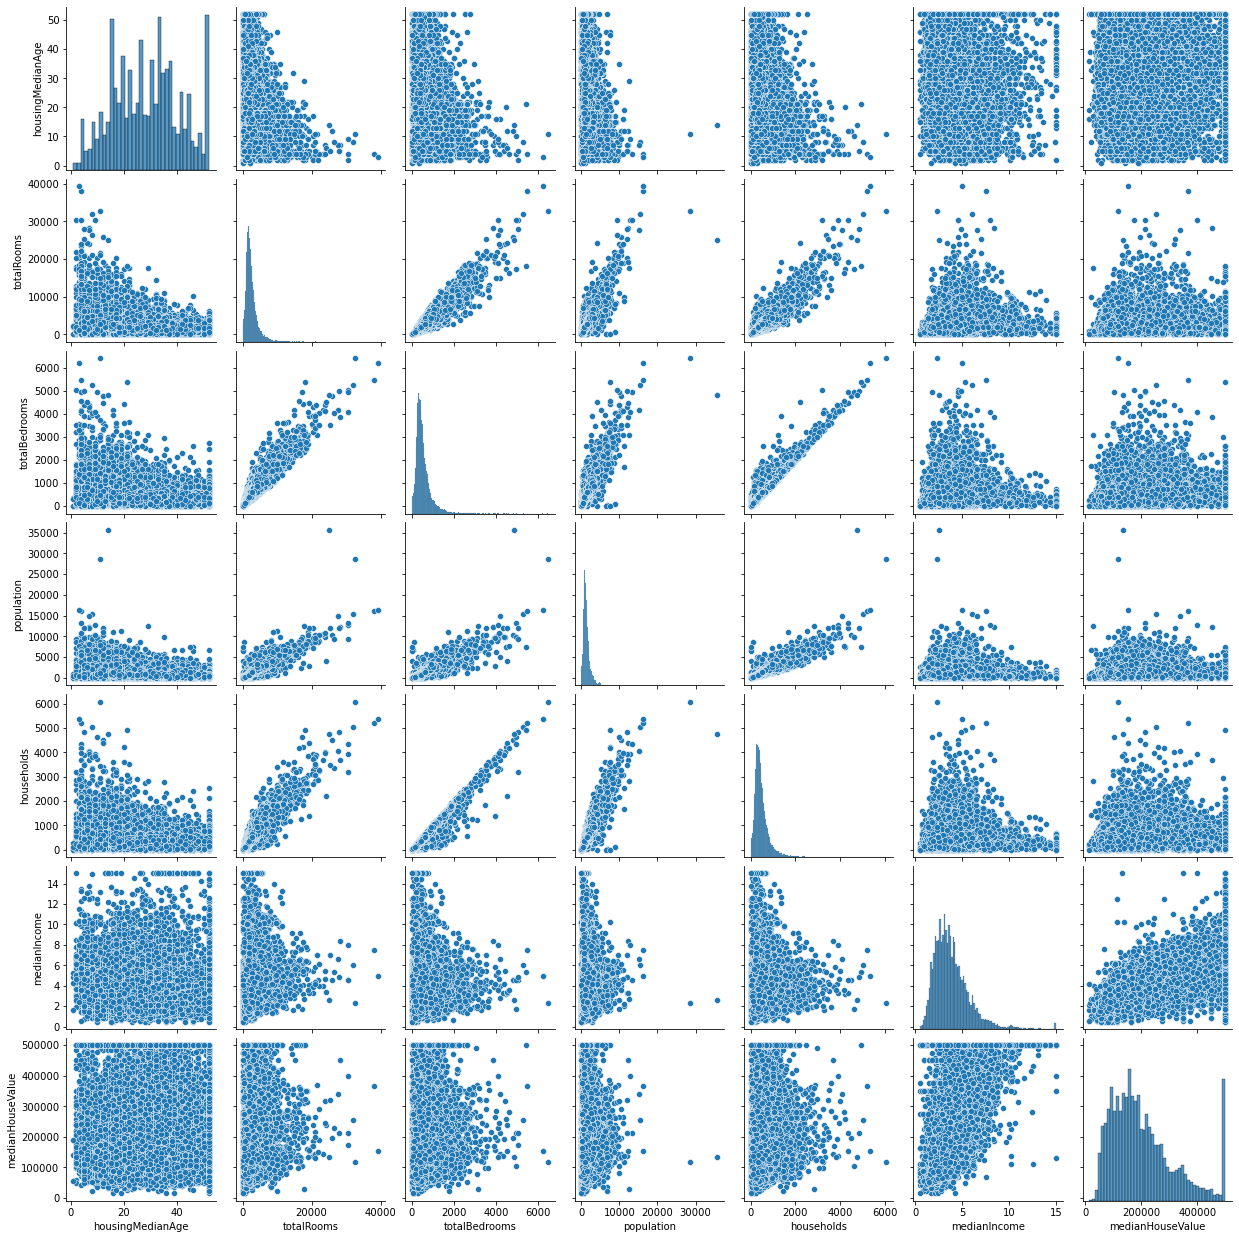

In [173]:
sns.pairplot(df)

### Scale the Feature Data

In [152]:
from sklearn.preprocessing import MinMaxScaler

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [155]:
scaler = MinMaxScaler()

In [156]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns,index=X_train.index)

In [157]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns,index=X_test.index)

In [158]:
X_train_scaled.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome
6761,0.352941,0.069688,0.117163,0.048769,0.115442,0.142508
3010,0.607843,0.011242,0.015673,0.008367,0.014142,0.045027
7812,0.666667,0.025230,0.031347,0.020971,0.030258,0.212866
8480,0.666667,0.032530,0.033830,0.024752,0.030094,0.298651
1051,0.294118,0.031919,0.035692,0.019466,0.034863,0.272631


### Create Feature Columns

In [159]:
df.columns

Index(['housingMedianAge', 'totalRooms', 'totalBedrooms', 'population',
       'households', 'medianIncome', 'medianHouseValue'],
      dtype='object')

In [160]:
housingMedianAge = tf.compat.v1.feature_column.numeric_column('housingMedianAge')
totalRooms = tf.compat.v1.feature_column.numeric_column('totalRooms')
totalBedrooms = tf.compat.v1.feature_column.numeric_column('totalBedrooms')
population = tf.compat.v1.feature_column.numeric_column('population')
households = tf.compat.v1.feature_column.numeric_column('households')
medianIncome = tf.compat.v1.feature_column.numeric_column('medianIncome')

In [161]:
feat_cols = [housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome]

In [162]:
feat_cols

[NumericColumn(key='housingMedianAge', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='totalRooms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='totalBedrooms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='population', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='households', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='medianIncome', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

** Create the input function for the estimator object. (play around with batch_size and num_epochs)**

In [163]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train_scaled,y=y_train,batch_size=10,
    num_epochs=10000,shuffle=True)

** Create the estimator model. Use a DNNRegressor. Play around with the hidden units! **

In [164]:
dnn_model = tf.compat.v1.estimator.DNNRegressor(hidden_units = [6,6,6],feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/tk/n3k58pnd31x8x6f8yp8dgllr0000gn/T/tmpewirw6ct', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


##### ** Train the model for ~1,000 steps. (Later come back to this and train it for more and check for improvement) **

In [165]:
dnn_model.train(input_fn=input_func,steps = 25000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/tk/n3k58pnd31x8x6f8yp8dgllr0000gn/T/tmpewirw6ct/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 573137900000.0, step = 0
INFO:tensorflow:global_step/sec: 842.771
INFO:tensorflow:loss = 738379200000.0, step = 100 (0.122 sec)
INFO:tensorflow:global_step/sec: 1117.74
INFO:tensorflow:loss = 578990640000.0, step = 200 (0.089 sec)
INFO:tensorflow:global_step/sec: 1126.37
INFO:tensorflow:loss = 509171660000.0, step = 300 (0.088 sec)
INFO:tensorflow:global_step/sec: 1050.98
INFO:tensorflow:loss = 720210500000.0, step = 400 (0.093 sec)
INFO:tensorflow:global_step/sec: 11

INFO:tensorflow:global_step/sec: 1134.37
INFO:tensorflow:loss = 77712170000.0, step = 7500 (0.088 sec)
INFO:tensorflow:global_step/sec: 1116.09
INFO:tensorflow:loss = 115682350000.0, step = 7600 (0.089 sec)
INFO:tensorflow:global_step/sec: 1217.37
INFO:tensorflow:loss = 50823230000.0, step = 7700 (0.083 sec)
INFO:tensorflow:global_step/sec: 1116.01
INFO:tensorflow:loss = 172069140000.0, step = 7800 (0.089 sec)
INFO:tensorflow:global_step/sec: 1157.97
INFO:tensorflow:loss = 68049430000.0, step = 7900 (0.086 sec)
INFO:tensorflow:global_step/sec: 1097.88
INFO:tensorflow:loss = 81012960000.0, step = 8000 (0.091 sec)
INFO:tensorflow:global_step/sec: 1167.76
INFO:tensorflow:loss = 127162530000.0, step = 8100 (0.086 sec)
INFO:tensorflow:global_step/sec: 1120.36
INFO:tensorflow:loss = 223591100000.0, step = 8200 (0.089 sec)
INFO:tensorflow:global_step/sec: 1162.37
INFO:tensorflow:loss = 133961015000.0, step = 8300 (0.086 sec)
INFO:tensorflow:global_step/sec: 1150.71
INFO:tensorflow:loss = 5670

INFO:tensorflow:global_step/sec: 1087.2
INFO:tensorflow:loss = 54637683000.0, step = 15400 (0.091 sec)
INFO:tensorflow:global_step/sec: 1175.48
INFO:tensorflow:loss = 33844154000.0, step = 15500 (0.086 sec)
INFO:tensorflow:global_step/sec: 1134.53
INFO:tensorflow:loss = 46858200000.0, step = 15600 (0.088 sec)
INFO:tensorflow:global_step/sec: 1051.98
INFO:tensorflow:loss = 46770012000.0, step = 15700 (0.094 sec)
INFO:tensorflow:global_step/sec: 1232.29
INFO:tensorflow:loss = 142153810000.0, step = 15800 (0.083 sec)
INFO:tensorflow:global_step/sec: 1033.36
INFO:tensorflow:loss = 100137390000.0, step = 15900 (0.095 sec)
INFO:tensorflow:global_step/sec: 1155.78
INFO:tensorflow:loss = 93899350000.0, step = 16000 (0.087 sec)
INFO:tensorflow:global_step/sec: 1139.09
INFO:tensorflow:loss = 155690860000.0, step = 16100 (0.088 sec)
INFO:tensorflow:global_step/sec: 1180.34
INFO:tensorflow:loss = 132587220000.0, step = 16200 (0.084 sec)
INFO:tensorflow:global_step/sec: 1206.4
INFO:tensorflow:loss 

INFO:tensorflow:global_step/sec: 1177.11
INFO:tensorflow:loss = 181993540000.0, step = 23300 (0.086 sec)
INFO:tensorflow:global_step/sec: 1235.96
INFO:tensorflow:loss = 60146434000.0, step = 23400 (0.082 sec)
INFO:tensorflow:global_step/sec: 1151.64
INFO:tensorflow:loss = 90406610000.0, step = 23500 (0.084 sec)
INFO:tensorflow:global_step/sec: 1220.75
INFO:tensorflow:loss = 206458100000.0, step = 23600 (0.083 sec)
INFO:tensorflow:global_step/sec: 1195.14
INFO:tensorflow:loss = 79469674000.0, step = 23700 (0.083 sec)
INFO:tensorflow:global_step/sec: 1208.75
INFO:tensorflow:loss = 75181520000.0, step = 23800 (0.082 sec)
INFO:tensorflow:global_step/sec: 1127.36
INFO:tensorflow:loss = 18561065000.0, step = 23900 (0.089 sec)
INFO:tensorflow:global_step/sec: 1175.16
INFO:tensorflow:loss = 202265820000.0, step = 24000 (0.086 sec)
INFO:tensorflow:global_step/sec: 1187.96
INFO:tensorflow:loss = 56202543000.0, step = 24100 (0.083 sec)
INFO:tensorflow:global_step/sec: 1096.97
INFO:tensorflow:loss

** Create a prediction input function and then use the .predict method off your estimator model to create a list or predictions on your test data. **

In [166]:
pred_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test_scaled,batch_size=10,
    num_epochs=1,shuffle=False)

In [167]:
predict_out = dnn_model.predict(input_fn=pred_func)

In [168]:
predictions = list(predict_out)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/tk/n3k58pnd31x8x6f8yp8dgllr0000gn/T/tmpewirw6ct/model.ckpt-25000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [169]:
predicted_values = []
for i in range(len(predictions)):
    predicted_values.append(predictions[i]['predictions'][0])

** Calculate the RMSE. You should be able to get around 100,000 RMSE (remember that this is in the same units as the label.) Do this manually or use [sklearn.metrics](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) **

In [170]:
from sklearn.metrics import mean_squared_error

In [171]:
np.sqrt(mean_squared_error(y_test,predicted_values))

98163.22905186511